In [1]:
using Pkg
Pkg.activate("C:\\Users\\Alex\\Desktop\\repo\\2612\\0903\\dynamical-systems\\env\\integrate\\")

  Activating project at `C:\Users\Alex\Desktop\repo\2612\0903\dynamical-systems\env\integrate`


In [2]:
using JLD, CairoMakie, GLMakie

In [4]:
path = "C:\\Users\\Alex\\Desktop\\repo\\2612\\0903\\dynamical-systems\\Tsodyks Markram\\Levanova\\3 набор параметров\\Сопоставление с матконт\\Карты спектров"
filenameLS = "\\LSs_300_300_time_500_left_angle.jld"
filenameu0s = "\\u0s_300_300_time_500_left_angle.jld"
pathLS = path*filenameLS
pathu0s = path*filenameu0s;

In [5]:
Λs = load(pathLS)["data"];

In [6]:
I0range = range( -1.6, -2.0,  length = 300 )
U0range = range( 0.27,  0.22, length = 300 )

0.27:-0.00016722408026755852:0.22

In [7]:
color_matrix = zeros(300, 300);

In [8]:
function check_condition(spectrum)
    
    checknull(spectrum[1]) && checknull(spectrum[2])  && spectrum[3]<0 ? color = 0 :
    checknull(spectrum[1]) && spectrum[2]<0  ? color = 1 :
    spectrum[1]>0  && checknull(spectrum[2])  && spectrum[3]<0 ? color = 3 :
    -1
end

function checknull(value)
    isapprox(value, 0.0; atol = 1e-1)
end

checknull (generic function with 1 method)

In [9]:
for (i, k1) in enumerate(I0range)
    
    for (j, k2) in enumerate(U0range)
        spectrum = Λs[i, j, :]
        color_matrix[i, j] = check_condition(spectrum)
    end
end

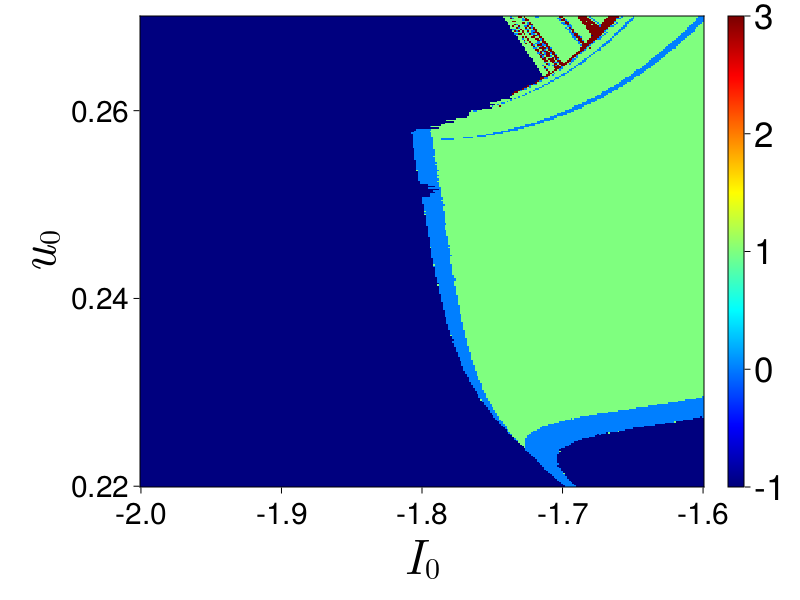

CairoMakie.Screen{IMAGE}


In [10]:
CairoMakie.activate!()

f = Figure()
ax1 = Axis(f[1, 1], xlabel = L"I_0",ylabel = L"u_0", xlabelsize = 50, ylabelsize = 50,
            xticklabelsize = 30, yticklabelsize = 30,
            xgridvisible  = false, ygridvisible = false)

hm = heatmap!(I0range, U0range, color_matrix, colormap = :jet)

Colorbar(f[1, 2], hm, ticklabelsize = 35)
display(f)